### **About The Dataset**

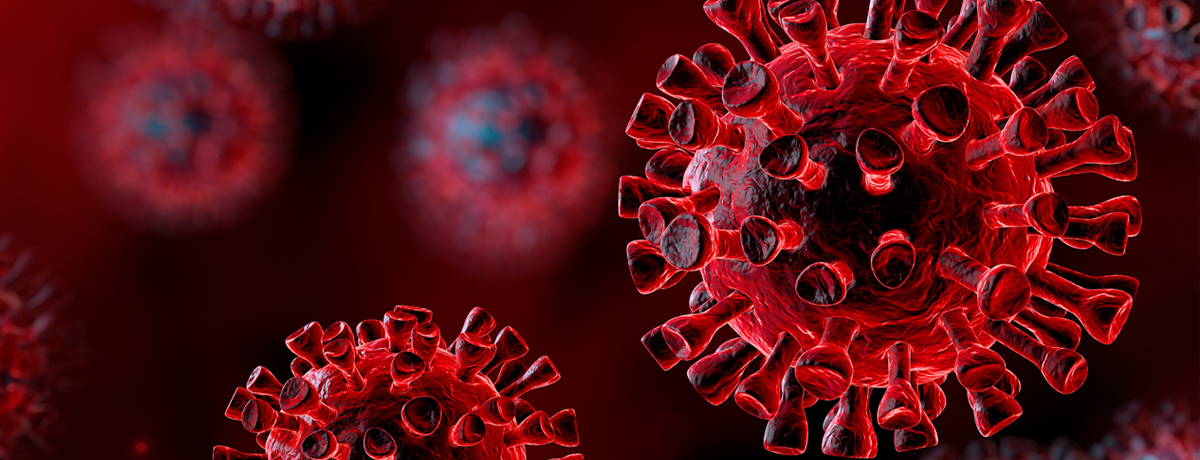

This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.
- **sex**: female or male
- **age**: of the patient.
- **classification**: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- **patient type**: hospitalized or not hospitalized.
- **pneumonia**: whether the patient already have air sacs inflammation or not.
- **pregnancy**: whether the patient is pregnant or not.
- **diabetes**: whether the patient has diabetes or not.
- **copd**: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- **asthma**: whether the patient has asthma or not.
- **inmsupr**: whether the patient is immunosuppressed or not.
- **hypertension**: whether the patient has hypertension or not.
- **cardiovascular**: whether the patient has heart or blood vessels related disease.
- **renal chronic**: whether the patient has chronic renal disease or not.
- **other disease**: whether the patient has other disease or not.
- **obesity**: whether the patient is obese or not.
- **tobacco**: whether the patient is a tobacco user.
- **usmr**: Indicates whether the patient treated medical units of the first, second or third level.
- **medical unit**: type of institution of the National Health System that provided the care.
- **intubed**: whether the patient was connected to the ventilator.
- **icu**: Indicates whether the patient had been admitted to an Intensive Care Unit.
- **death**: indicates whether the patient died or recovered.

### **Overview Dataset**

In [1]:
import os
from pathlib import Path
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = Path('../data')
if not data_dir.exists():
    data_dir.mkdir(parents=True)

# Download the dataset if it doesn't exist.
url = "https://www.kaggle.com/api/v1/datasets/download/meirnizri/covid19-dataset"
data_file = data_dir / "covid19-dataset.zip"

print("Downloading dataset...")
os.system(f"curl -L -o {data_file} {url}")
shutil.unpack_archive(data_file, data_dir)
os.remove(data_file)
print("Download complete.")

Download complete.


In [3]:
data_file = Path(r'..\data\Covid Data.csv')
df = pd.read_csv(data_file)
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [7]:
for i in df.columns:
    print(i, " : ", df[i].nunique())

USMER  :  2
MEDICAL_UNIT  :  13
SEX  :  2
PATIENT_TYPE  :  2
DATE_DIED  :  401
INTUBED  :  4
PNEUMONIA  :  3
AGE  :  121
PREGNANT  :  4
DIABETES  :  3
COPD  :  3
ASTHMA  :  3
INMSUPR  :  3
HIPERTENSION  :  3
OTHER_DISEASE  :  3
CARDIOVASCULAR  :  3
OBESITY  :  3
RENAL_CHRONIC  :  3
TOBACCO  :  3
CLASIFFICATION_FINAL  :  7
ICU  :  4


### **EDA and Preprocessing**

In [8]:
# df.drop_duplicates(inplace=True)
# print("Shape of the dataset after removing duplicates:", df.shape)

In [9]:
df['DATE_DIED'].value_counts()

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
26/03/2021         1
31/03/2021         1
02/04/2021         1
13/04/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [10]:
df['TARGET'] = [2 if row == '9999-99-99' else 1 for row in df['DATE_DIED']]
df.drop(['DATE_DIED'], axis=1, inplace=True)

In [11]:
df['TARGET'].value_counts()

TARGET
2    971633
1     76942
Name: count, dtype: int64

In [12]:
df['TARGET'].isnull().sum()

np.int64(0)

In [13]:
df['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

In [14]:
df['CLASIFFICATION_FINAL'] = [1 if row in [1, 2, 3] else 2 for row in df['CLASIFFICATION_FINAL']]

In [15]:
removed_cols = []
print("Percent of unknown values....")
for col in df.columns:
    if col == "AGE":
        continue
    total = len(df)
    count = ((df[col] != 1) & (df[col] != 2)).sum()
    percent = (count / total) * 100
    print(f" - {col}: {percent:.4f}%")
    if percent > 40:
        removed_cols.append(col)

print("Columns to be removed due to high percentage of unknown values:", removed_cols)

Percent of unknown values....
 - USMER: 0.0000%
 - MEDICAL_UNIT: 99.9695%
 - SEX: 0.0000%
 - PATIENT_TYPE: 0.0000%
 - INTUBED: 81.6221%
 - PNEUMONIA: 1.5262%
 - PREGNANT: 50.2840%
 - DIABETES: 0.3183%
 - COPD: 0.2864%
 - ASTHMA: 0.2841%
 - INMSUPR: 0.3246%
 - HIPERTENSION: 0.2960%
 - OTHER_DISEASE: 0.4811%
 - CARDIOVASCULAR: 0.2934%
 - OBESITY: 0.2892%
 - RENAL_CHRONIC: 0.2867%
 - TOBACCO: 0.3071%
 - CLASIFFICATION_FINAL: 0.0000%
 - ICU: 81.6377%
 - TARGET: 0.0000%
Columns to be removed due to high percentage of unknown values: ['MEDICAL_UNIT', 'INTUBED', 'PREGNANT', 'ICU']


In [16]:
df.drop(columns=["INTUBED","ICU","MEDICAL_UNIT", "PATIENT_TYPE"], inplace=True)

In [17]:
# Đếm số lượng giá trị tổ hợp giữa 2 feature SEX và PREGNANT
comb_counts = df.groupby(['SEX', 'PREGNANT']).size().reset_index(name='count')
print(comb_counts)

   SEX  PREGNANT   count
0    1         1    8131
1    1         2  513179
2    1        98    3754
3    2        97  523511


We see that all "97" values are for males and males can not be pregnant so we will convert 97 to 2. Beside that, we will drop all row wich have "98" values in "PRENANT" feture

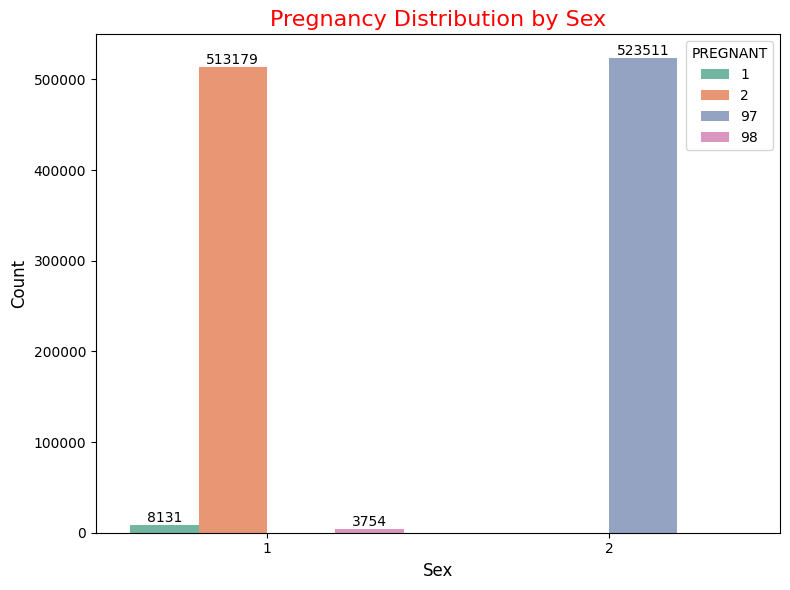

In [18]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="SEX", hue="PREGNANT", data=df, palette="Set2")
ax.set_title("Pregnancy Distribution by Sex", color="red", fontsize=16)
ax.set_xlabel("Sex", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.tight_layout()
plt.show()

In [19]:
df['PREGNANT'] = df['PREGNANT'].replace(97, 2)
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

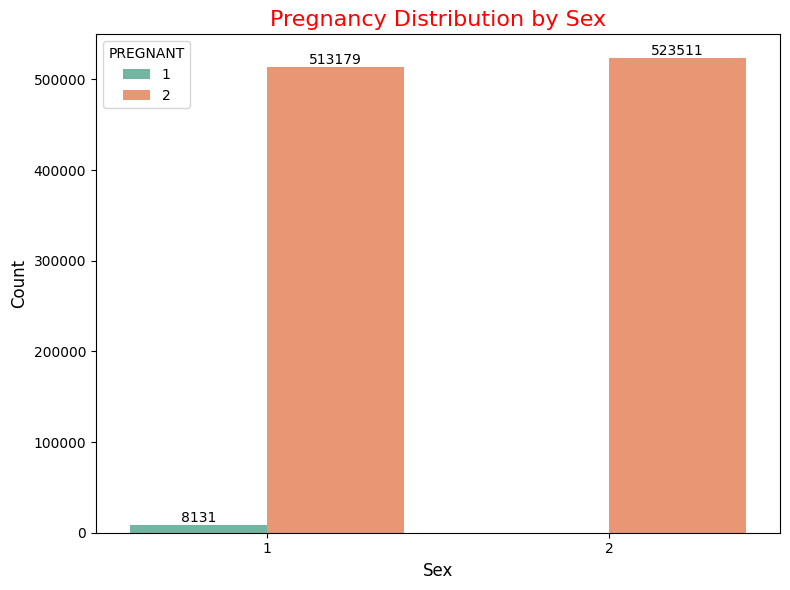

In [20]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="SEX", hue="PREGNANT", data=df, palette="Set2")
ax.set_title("Pregnancy Distribution by Sex", color="red", fontsize=16)
ax.set_xlabel("Sex", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.tight_layout()
plt.show()

In [21]:
print("Shape of the dataset before removing unknown value:", df.shape)
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION',
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    df = df[(df[col] == 1)|(df[col] == 2)]

print("Shape of the dataset after removing unknown value:", df.shape)

Shape of the dataset before removing unknown value: (1044821, 17)
Shape of the dataset after removing unknown value: (1021977, 17)


In [22]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
SEX =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 2
TARGET =>	 2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021977 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1021977 non-null  int64
 1   SEX                   1021977 non-null  int64
 2   PNEUMONIA             1021977 non-null  int64
 3   AGE                   1021977 non-null  int64
 4   PREGNANT              1021977 non-null  int64
 5   DIABETES              1021977 non-null  int64
 6   COPD                  1021977 non-null  int64
 7   ASTHMA                1021977 non-null  int64
 8   INMSUPR               1021977 non-null  int64
 9   HIPERTENSION          1021977 non-null  int64
 10  OTHER_DISEASE         1021977 non-null  int64
 11  CARDIOVASCULAR        1021977 non-null  int64
 12  OBESITY               1021977 non-null  int64
 13  RENAL_CHRONIC         1021977 non-null  int64
 14  TOBACCO               1021977 non-null  int64
 15  CLASIFFICATION_FINAL

In [24]:
# Get columns with exactly 2 unique values
binary_columns = []
for column in df.columns:
    if df[column].nunique() == 2:
        binary_columns.append(column)

print(f"Binary columns (with 2 unique values): {binary_columns}")

# Convert value 2 to 0 in binary columns
for column in binary_columns:
    df[column] = df[column].replace(2, 0)

print("\nAfter conversion (sample rows):")
df.head()

Binary columns (with 2 unique values): ['USMER', 'SEX', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'TARGET']

After conversion (sample rows):


,USMER,SEX,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,TARGET
0,0,1,1,65,0,0,0,0,0,1,0,0,0,0,0,1,1
1,0,0,1,72,0,0,0,0,0,1,0,0,1,1,0,0,1
2,0,0,0,55,0,1,0,0,0,0,0,0,0,0,0,1,1
3,0,1,0,53,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,68,0,1,0,0,0,1,0,0,0,0,0,1,1


Text(0.5, 1.0, 'Age Distribution')

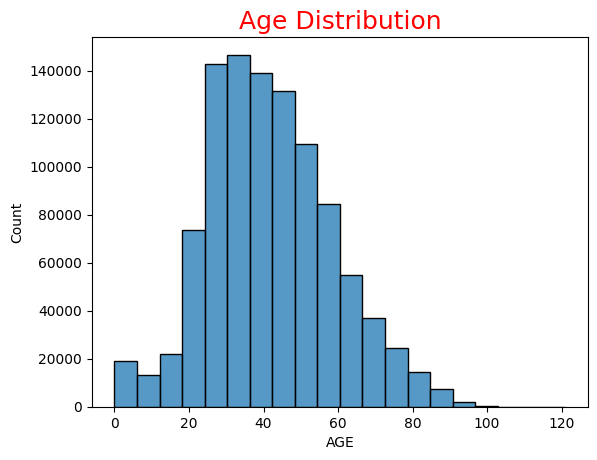

In [25]:
sns.histplot(x=df.AGE, bins=20)
plt.title("Age Distribution", color="red", fontsize=18)

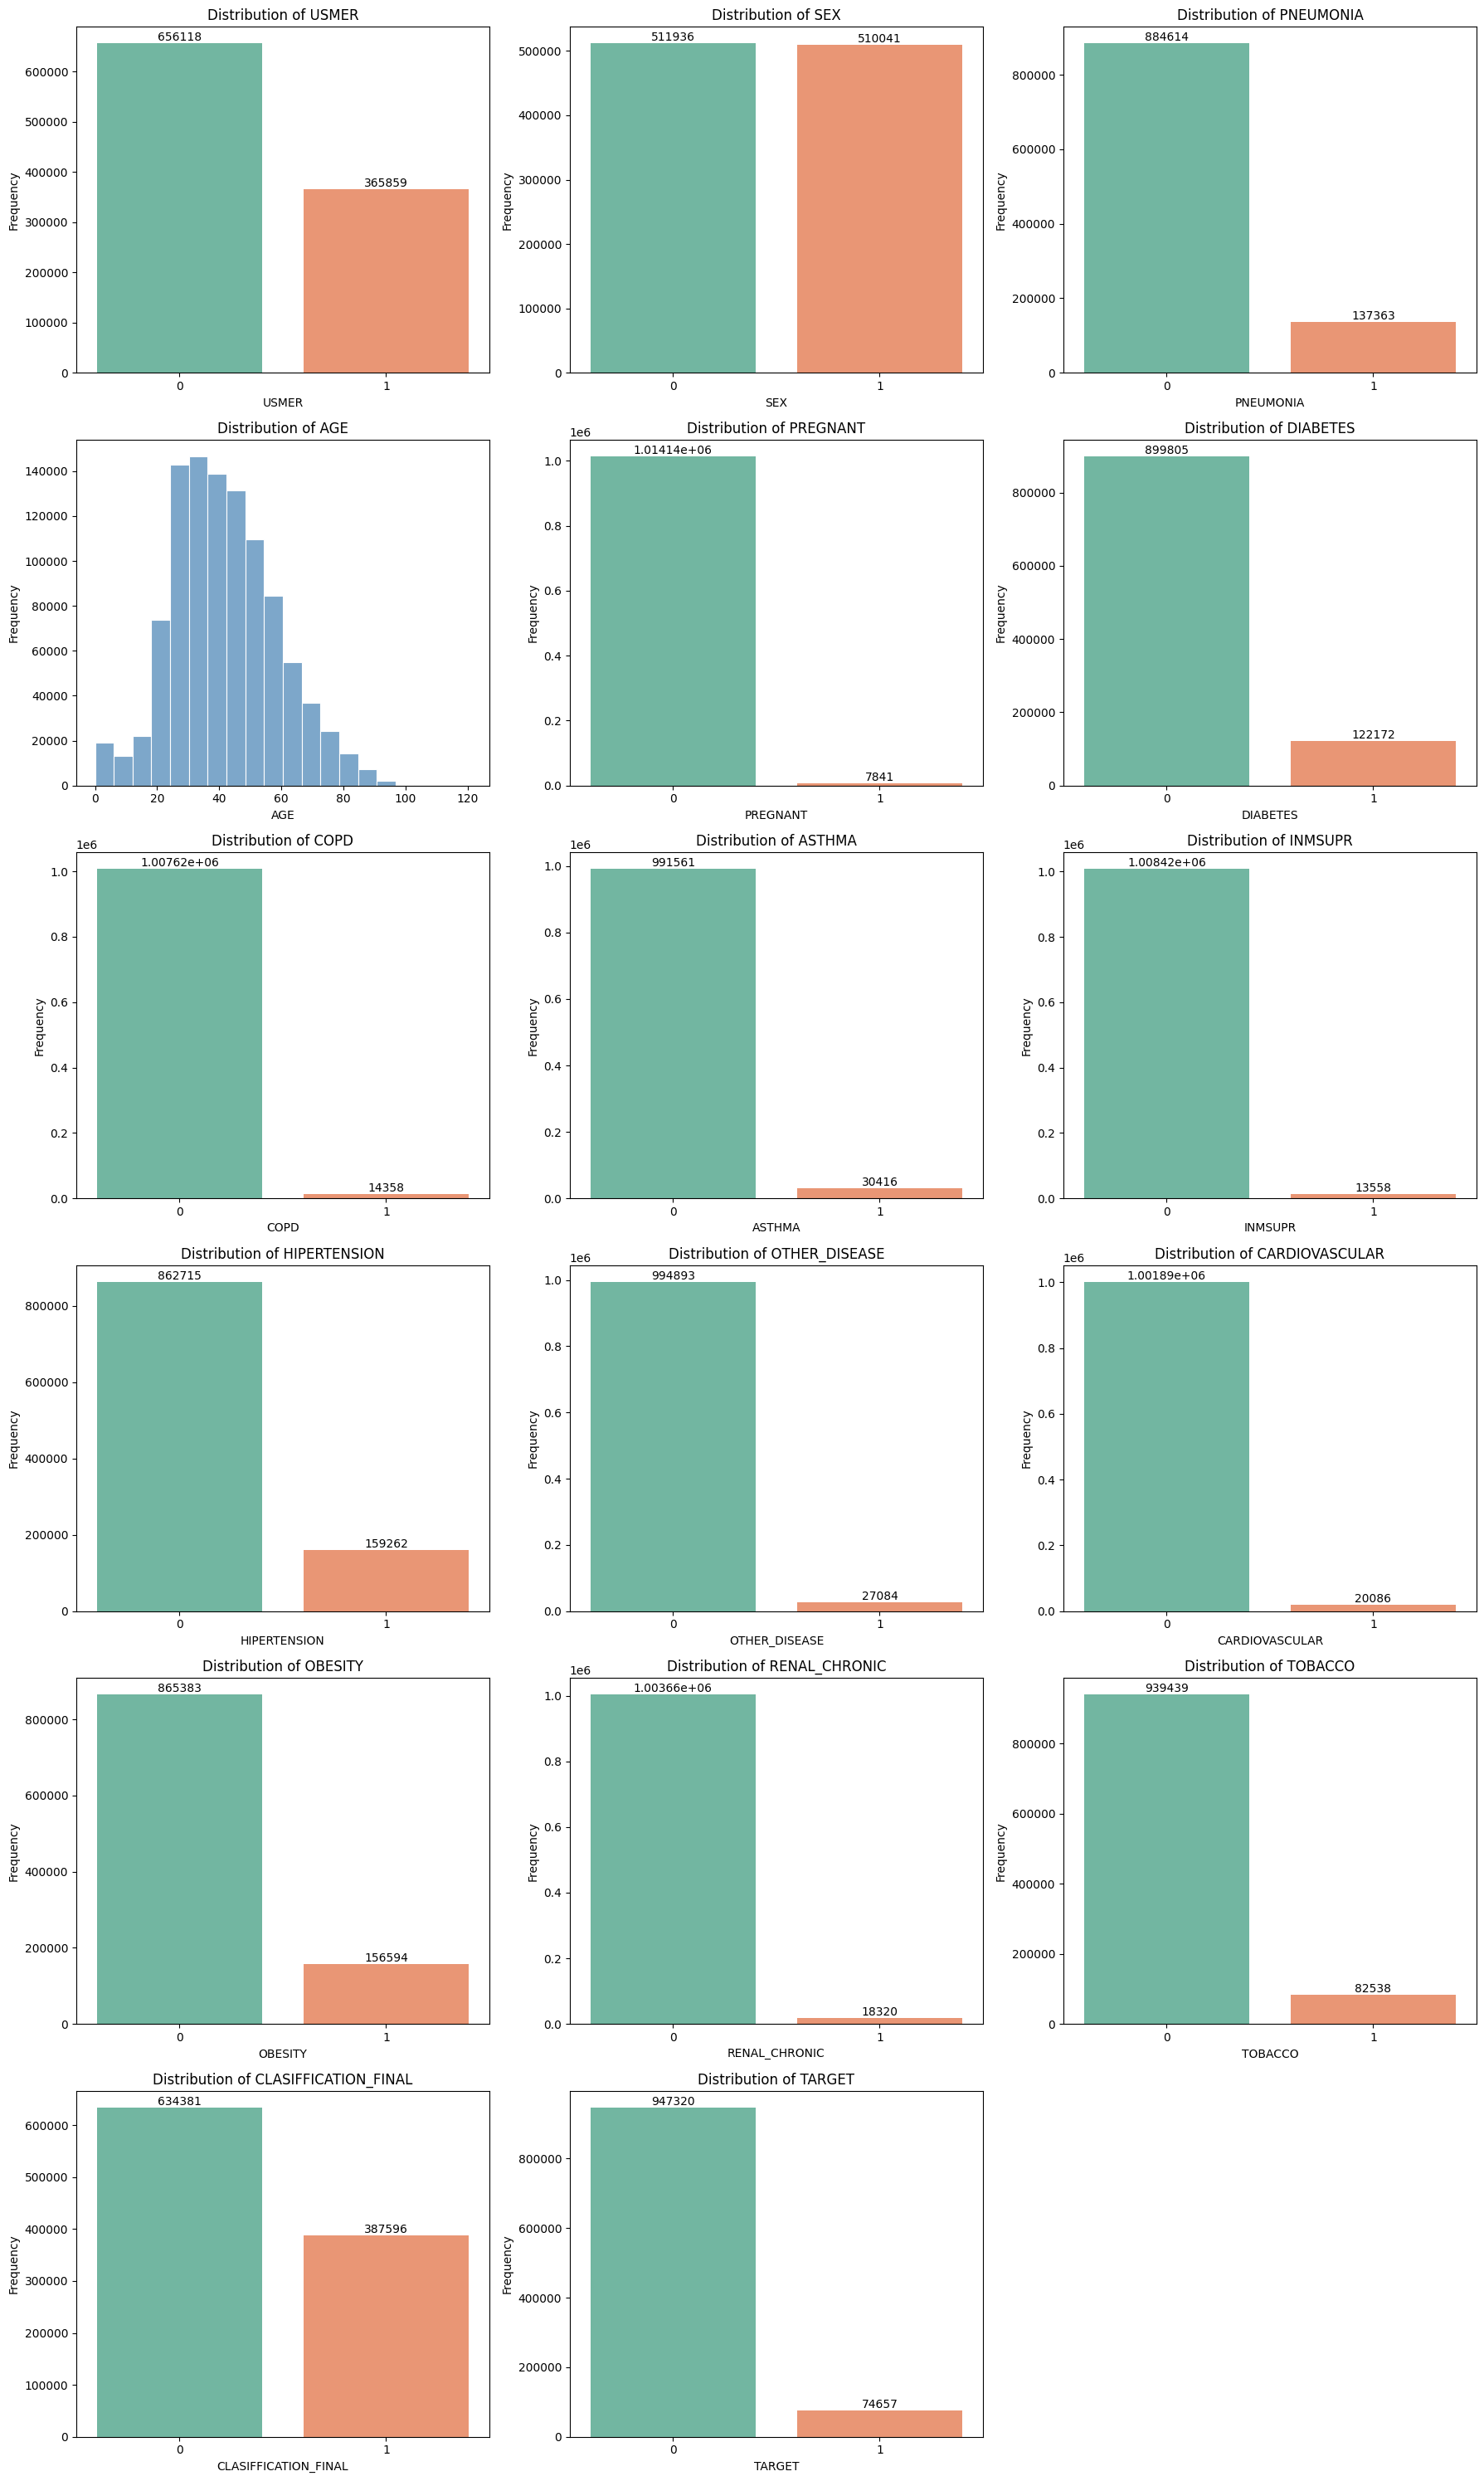

In [26]:
num_cols = len(df.columns)
n_cols = 3
n_rows = (num_cols // n_cols) + (num_cols % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Create histograms for all columns
for i, column in enumerate(df.columns):
    if df[column].dtype in ['int64', 'float64']:
        if column in binary_columns:
            # For binary columns (0/1), create countplot
            sns.countplot(x=df[column], ax=axes[i], hue=df[column], palette='Set2', legend=False)
            for container in axes[i].containers:
                axes[i].bar_label(container, fontsize=10)
        else:
            # For numeric columns with more values, create histplot
            sns.histplot(df[column], bins=20, ax=axes[i],
                         color='steelblue', alpha=0.7, edgecolor='white', linewidth=0.8)
    else:
        # For categorical columns
        sns.countplot(x=df[column], ax=axes[i], hue=df[column], palette='Set2', legend=False)
        for container in axes[i].containers:
            axes[i].bar_label(container, fontsize=10)

    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(num_cols, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

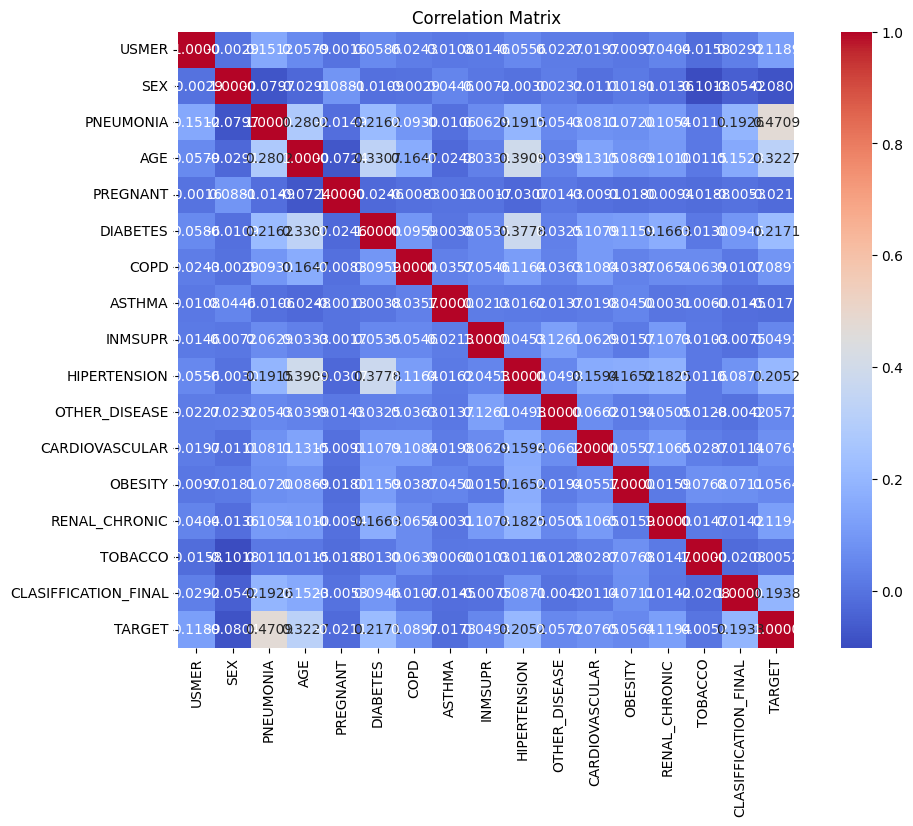

In [27]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

C:\Users\LENOVO IDEAPAD\AppData\Local\Temp\ipykernel_14696\583569754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_matrix.values, y=correlation_matrix.index, palette='coolwarm')


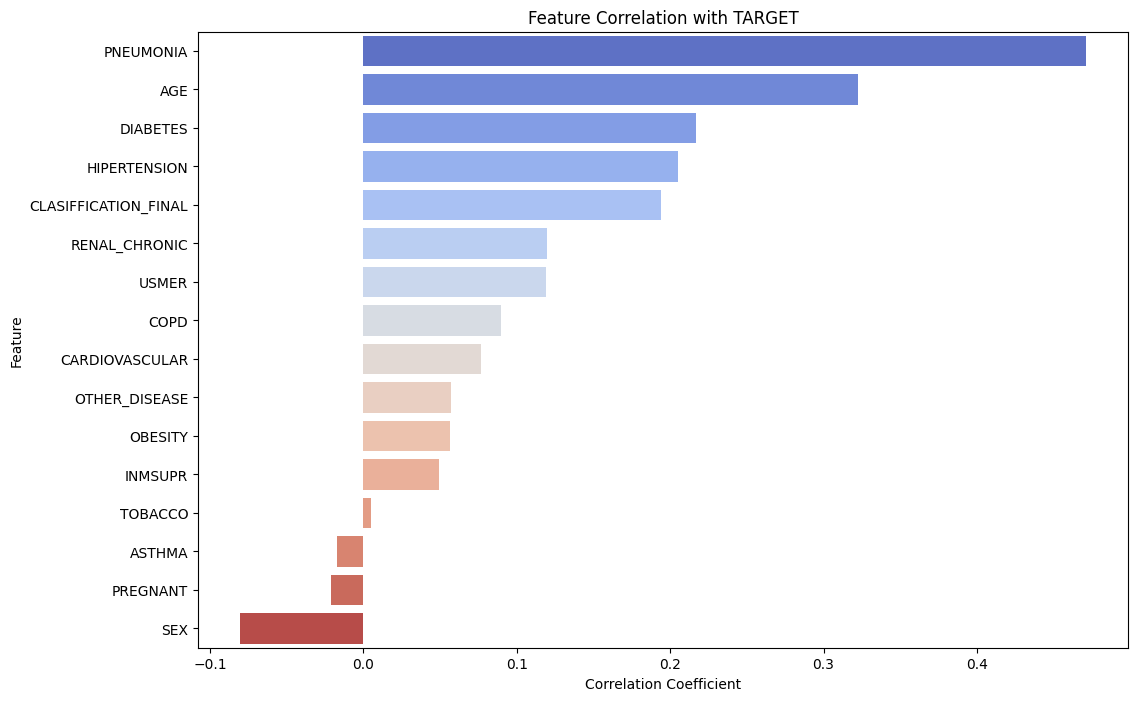

In [28]:
# Correlation with TARGET (barplot visualization)
correlation_matrix = df.corr()['TARGET'].drop('TARGET').sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_matrix.values, y=correlation_matrix.index, palette='coolwarm')
plt.title('Feature Correlation with TARGET')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

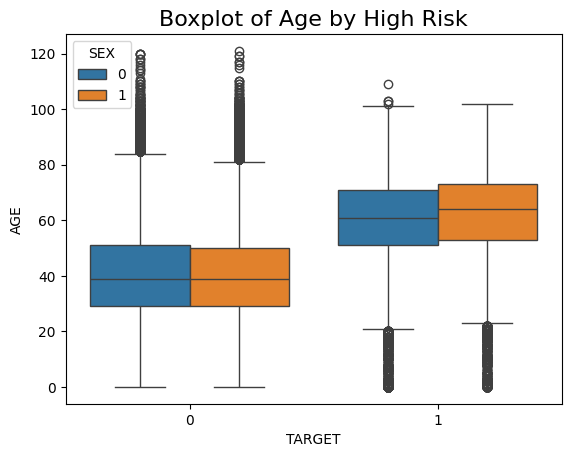

In [29]:
sns.boxplot(x="TARGET", y="AGE",hue="SEX",data=df)
plt.title("Boxplot of Age by High Risk", fontsize=16)
plt.show()

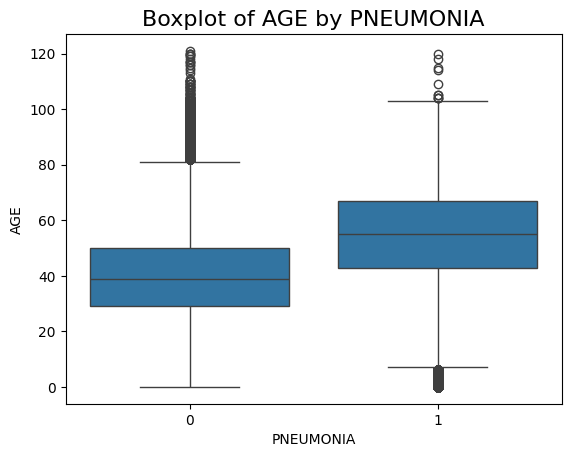

In [30]:
sns.boxplot(x='PNEUMONIA', y='AGE', data=df)
plt.title('Boxplot of AGE by PNEUMONIA', fontsize=16)
plt.show()

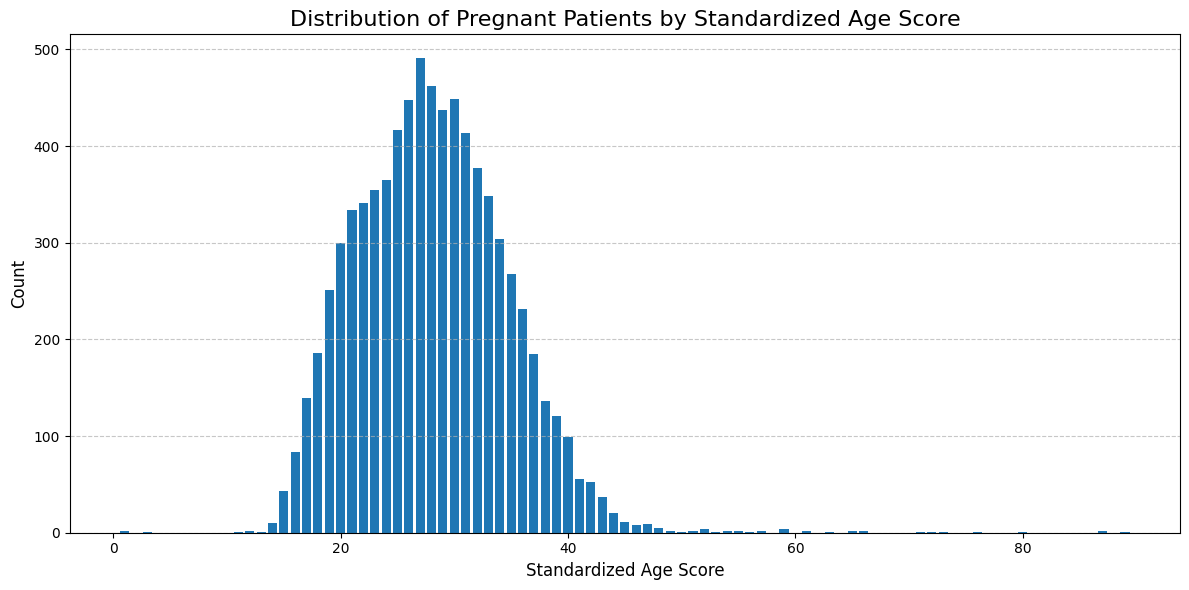

Statistics of pregnant patients by age:


,Standardized_Age_Score,Count
0,1,2
1,3,1
2,11,1
3,12,2
4,13,1
...,...,...
56,73,1
57,76,1
58,80,1
59,87,2



Total pregnant patients: 7841


In [31]:
# Filter for pregnant patients (PREGNANT = 1) with age >= 50
pregnant_age_counts = df[(df['PREGNANT'] == 1) & (df['AGE'] > 0)]  # Using standardized age

# Calculate age distribution for pregnant patients
pregnant_age_counts = pregnant_age_counts['AGE'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(pregnant_age_counts.index, pregnant_age_counts.values)
plt.title('Distribution of Pregnant Patients by Standardized Age Score', fontsize=16)
plt.xlabel('Standardized Age Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Let's also create a table showing these statistics
pregnant_stats = pd.DataFrame({
    'Standardized_Age_Score': pregnant_age_counts.index,
    'Count': pregnant_age_counts.values
})

print("Statistics of pregnant patients by age:")
display(pregnant_stats)

# Check the number of pregnant patients with unusual ages
print(f"\nTotal pregnant patients: {df[df['PREGNANT'] == 1].shape[0]}")

In [32]:
# xóa những cột người có thai trên 60 tuổi và bé hơn 10 tuổi
df = df[~((df['PREGNANT'] == 1) & ((df['AGE'] > 60) | (df['AGE'] < 10)))]
print(f"Total pregnant patients after filtering: {df[df['PREGNANT'] == 1].shape[0]}")

Total pregnant patients after filtering: 7818


In [33]:
# Save the cleaned dataset
processed_data_file = Path("../data/data.csv")
if not processed_data_file.parent.exists():
    processed_data_file.parent.mkdir(parents=True)

df.to_csv(processed_data_file, index=False)
print(f"Processed dataset saved to {processed_data_file}")

Processed dataset saved to ..\data\data.csv


### **Data Split**

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Split the dataset into training, validating and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42, stratify=y_val)
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}, Test set shape: {X_test.shape}")

Training set shape: (613172, 16), Validation set shape: (204391, 16), Test set shape: (204391, 16)


C:\Users\LENOVO IDEAPAD\AppData\Local\Temp\ipykernel_14696\4042241242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


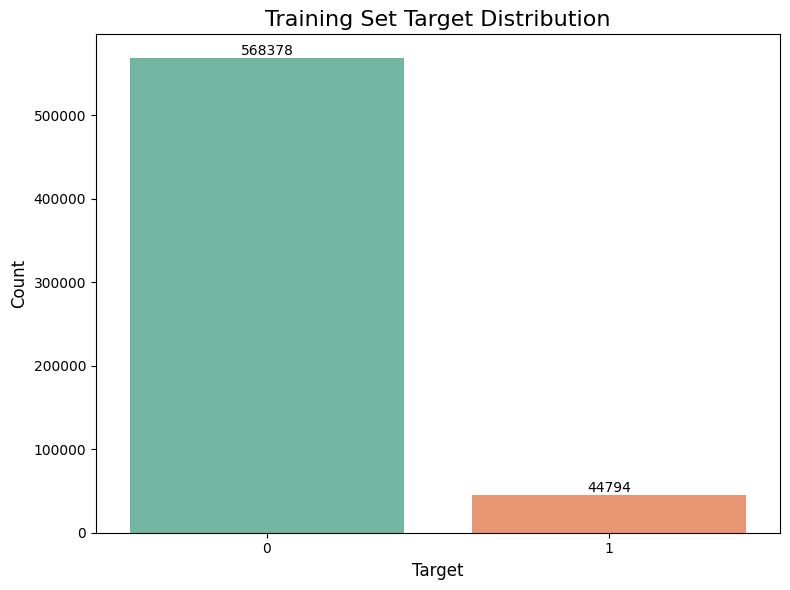

C:\Users\LENOVO IDEAPAD\AppData\Local\Temp\ipykernel_14696\4042241242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


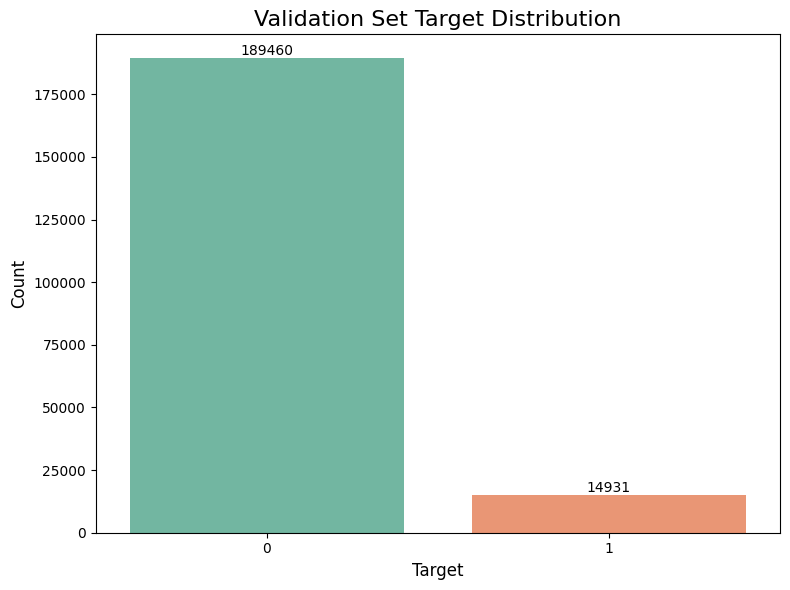

C:\Users\LENOVO IDEAPAD\AppData\Local\Temp\ipykernel_14696\4042241242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


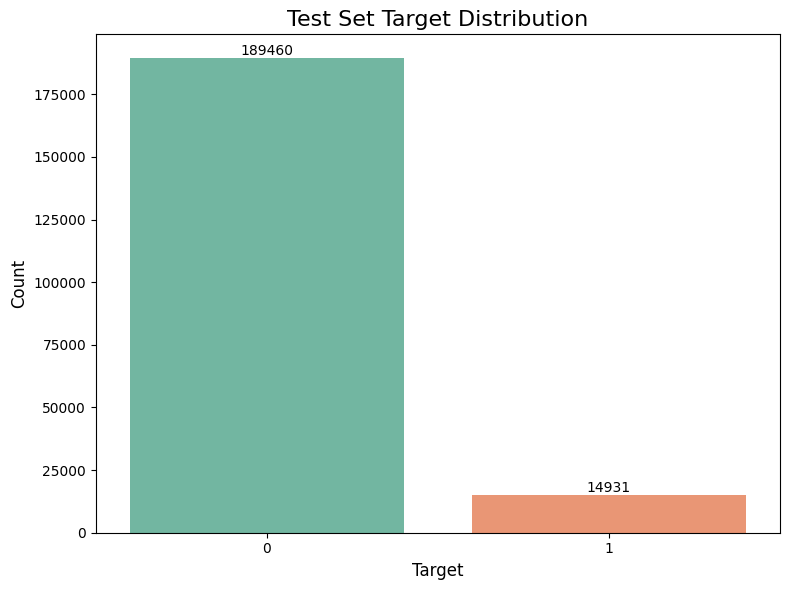

In [35]:
# Plot the distribution of the target variable in each set
def plot_target_distribution(y, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y, palette='Set2')
    plt.title(title, fontsize=16)
    plt.xlabel('Target', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fontsize=10)
    plt.tight_layout()
    plt.show()

plot_target_distribution(y_train, 'Training Set Target Distribution')
plot_target_distribution(y_val, 'Validation Set Target Distribution')
plot_target_distribution(y_test, 'Test Set Target Distribution')

In [36]:
# Save the train, validation, and test sets
train_data_file = Path("../data/train.csv")
val_data_file = Path("../data/val.csv")
test_data_file = Path("../data/test.csv")

train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
val_data = pd.concat([X_val.reset_index(drop=True), y_val.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
if not train_data_file.parent.exists():
    train_data_file.parent.mkdir(parents=True)

if not val_data_file.parent.exists():
    val_data_file.parent.mkdir(parents=True)
if not test_data_file.parent.exists():
    test_data_file.parent.mkdir(parents=True)

train_data.to_csv(train_data_file, index=False)
val_data.to_csv(val_data_file, index=False)
test_data.to_csv(test_data_file, index=False)
print(f"Train, validation, and test sets saved to {train_data_file}, {val_data_file}, and {test_data_file} respectively.")

Train, validation, and test sets saved to ..\data\train.csv, ..\data\val.csv, and ..\data\test.csv respectively.
